# Steam Games Data Analysis

This notebook provides a comprehensive analysis of the Steam Games dataset.

## Data Exploration

Load the preprocessed Steam Games dataset from the data folder.

In [1]:
import torch, transformers
print("Kernel OK")

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Count unique appIds
num_apps = len(df['appid'].unique())
total_rows = len(df)

print(f"Total number of unique appIds: {num_apps}")
print(f"Total rows in dataset: {total_rows}")

: 

### Basic Information

In [20]:
# Display column names as a DataFrame table
columns_df = pd.DataFrame({
    'Column Index': range(len(df.columns)),
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})

columns_df

,Column Index,Column Name,Data Type
0,0,appid,int64
1,1,name,object
2,2,required_age,int64
3,3,is_free,bool
4,4,controller_support,bool
5,5,short_description,object
6,6,detailed_description,object
7,7,about_the_game,object
8,8,genres,object
9,9,categories,object


### Column Information

In [21]:
# Display first few rows with all columns visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head()

,appid,name,required_age,is_free,controller_support,short_description,detailed_description,about_the_game,genres,categories,pc_requirements_min,pc_requirements_rec,mac_requirements_min,mac_requirements_rec,linux_requirements_min,linux_requirements_rec,release_date,developers,publishers,price_initial,price_final,discount_percent,metacritic_score,platforms_windows,platforms_mac,platforms_linux,recommendations_total
0,10,Counter-Strike,0,False,False,Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.,Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.,Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role.,['action'],"['multi-player', 'pvp', 'online pvp', 'shared/split screen pvp', 'color alternatives', 'custom volume controls', 'keyboard only option', 'stereo sound', 'valve anti-cheat enabled', 'family sharing']","Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet Connection Recommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",NaN,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher, ATI X1600 or higher, or Intel HD 3000 or higher Mouse, Keyboard, Internet Connection",NaN,"Minimum: Linux Ubuntu 12.04, Dual-core from Intel or AMD at 2.8 GHz, 1GB Memory, nVidia GeForce 8600/9600GT, ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310, AMD 12.11), OpenGL 2.1, 4GB Hard Drive Space, OpenAL Compatible Sound Card",NaN,2000-11-01,Valve,Valve,9.99,9.99,0,88,True,True,True,162625
1,30,Day of Defeat,0,False,False,"Enlist in an intense brand of Axis vs. Allied teamplay set in the WWII European Theatre of Operations. Players assume the role of light/assault/heavy infantry, sniper or machine-gunner class, each with a unique arsenal of historical weaponry at their disposal. Missions are based on key historical operations.","Enlist in an intense brand of Axis vs. Allied teamplay set in the WWII European Theatre of Operations. Players assume the role of light/assault/heavy infantry, sniper or machine-gunner class, each with a unique arsenal of historical weaponry at their disposal. Missions are based on key historical operations. And, as war rages, players must work together with their squad to accomplish a variety of mission-specific objectives.","Enlist in an intense brand of Axis vs. Allied teamplay set in the WWII European Theatre of Operations. Players assume the role of light/assault/heavy infantry, sniper or machine-gunner class, each with a unique arsenal of historical weaponry at their disposal. Missions are based on key historical operations. And, as war rages, players must work together with their squad to accomplish a variety of mission-specific objectives.",['action'],"['multi-player', 'camera comfort', 'color alternatives', 'custom volume controls', 'stereo sound', 'valve anti-cheat enabled', 'family sharing']","Minimum: 500 mhz processor, 96mb ram, 16mb video card, Windows XP, Mouse, Keyboard, Internet Connection Recommended: 800 mhz processor, 128mb ram, 32mb+ video card, Windows XP, Mouse, Keyboard, Internet Connection",NaN,"Minimum: OS X Snow Leopard 10.6.3, 1GB RAM, 4GB Hard Drive Space,NVIDIA GeForce 8 or higher

### Sample Data

In [22]:
# Missing values by column sorted descending
missing_values = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

missing_values

,Column,Missing Count,Missing %
15,linux_requirements_rec,1723,65.71
13,mac_requirements_rec,1620,61.78
14,linux_requirements_min,1381,52.67
12,mac_requirements_min,1089,41.53
11,pc_requirements_rec,961,36.65
18,publishers,25,0.95
17,developers,10,0.38
7,about_the_game,8,0.31
6,detailed_description,5,0.19
8,genres,4,0.15


### Data Quality

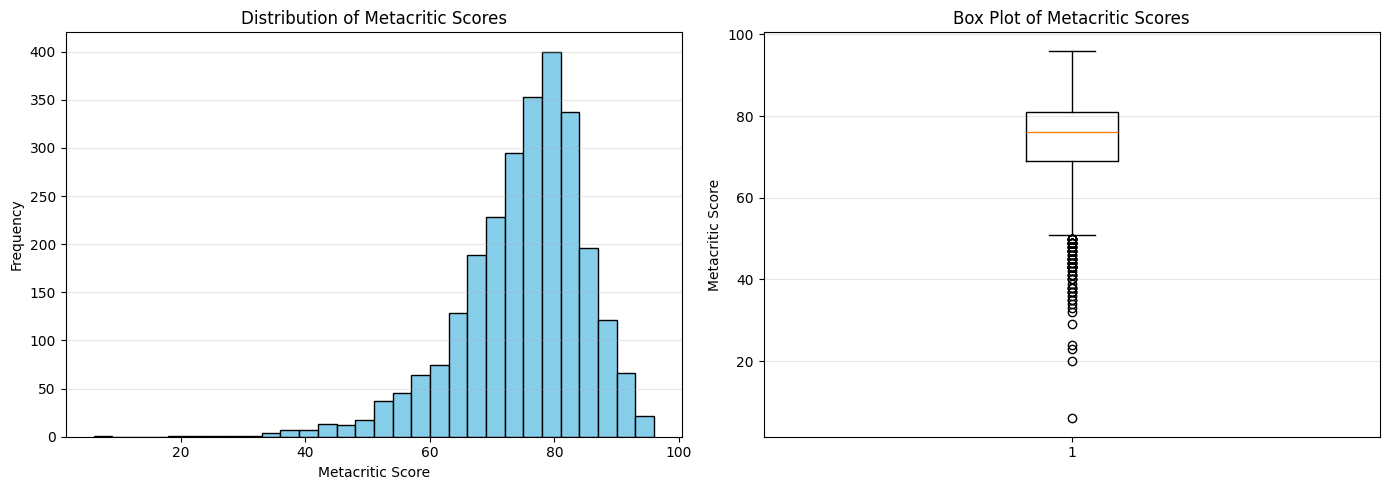


Metacritic Score Statistics:
count    2622.000000
mean       74.473303
std        10.134081
min         6.000000
25%        69.000000
50%        76.000000
75%        81.000000
max        96.000000
Name: metacritic_score, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# Create figure with histogram and box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['metacritic_score'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Metacritic Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Metacritic Scores')
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['metacritic_score'].dropna())
axes[1].set_ylabel('Metacritic Score')
axes[1].set_title('Box Plot of Metacritic Scores')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nMetacritic Score Statistics:")
print(df['metacritic_score'].describe())

### Metacritic Score Distribution